In [1]:
import pandas as pd
import scipy
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from utils.generators import UserGenerator

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# A simple generator to simulate userdata
ug = UserGenerator(column_label='Clickthrough Rate')

In [3]:
# creating a dataframe prelabeled for AB testing
# the outcome will contain 2 groups, A with a success rate of 12% B with a success rate of 10 % . 
df = ug.generate_ab_split_df(nr_of_users=4000,positive_ratio_A=0.12, positive_ratio_B=0.1, nr_of_days=5,AB_user_ratio=0.5)

In [ ]:
# generate a few thousand simulations

lifts = np.linspace(0,.27,num=200) # between 0 and 30% increase
users = [n*10 for n in range(1, 800)]  # 100 to 10000 users
repetitions = 4

count = 0

p_val_norm = pd.DataFrame()
p_val_binom = pd.DataFrame()

for user in tqdm(users):
    for lift in lifts:  
        for repetition in range(repetitions):
            count +=1

            
            pn, pb = simulate_ABtest(ug, user, lift)
            
#            p_val_norm_dict[f'{lift}-{user}-{repetition}'] = pn
#            p_val_binom_dict[f'{lift}-{user}-{repetition}'] = pb
            
            
            p_val_norm = p_val_norm.append(pd.Series({'lift':lift, 'users':user,'rep': repetition, 'pval':pn}),ignore_index=True )
            p_val_binom = p_val_norm.append(pd.Series({'lift':lift, 'users':user,'rep':repetition, 'pval':pb}),ignore_index=True )

In [ ]:
#p_val_binom.to_csv('pvalues_binom_table_more_detailled.csv')
#p_val_norm.to_csv('pvalues_norm_table_more_detailled.csv')

In [4]:
p_val_binom = pd.read_csv('pvalues_binom_table_more_detailled.csv', index_col=0)
p_val_norm = pd.read_csv('pvalues_norm_table_more_detailled.csv', index_col=0)

In [5]:
p_val_binom.dropna(inplace=True)
p_val_norm.dropna(inplace=True)

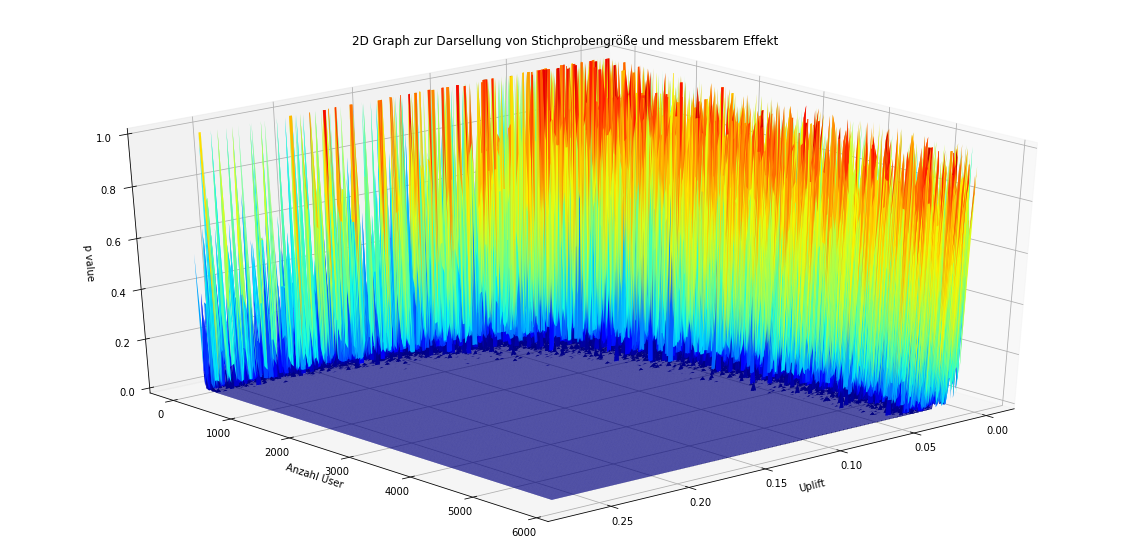

In [6]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# Other palette
ax.plot_trisurf(p_val_binom['lift'],p_val_binom['users'], p_val_binom['pval'], cmap=plt.cm.jet, linewidth=0.01)

ax.set_title("2D Graph zur Darsellung von Stichprobengröße und messbarem Effekt") 
ax.set(xlabel='Uplift', ylabel='Anzahl User',zlabel='p value')
# Rotate it
ax.view_init(30, 49)

#ax.set_zscale(plot_pval)

plt.show()

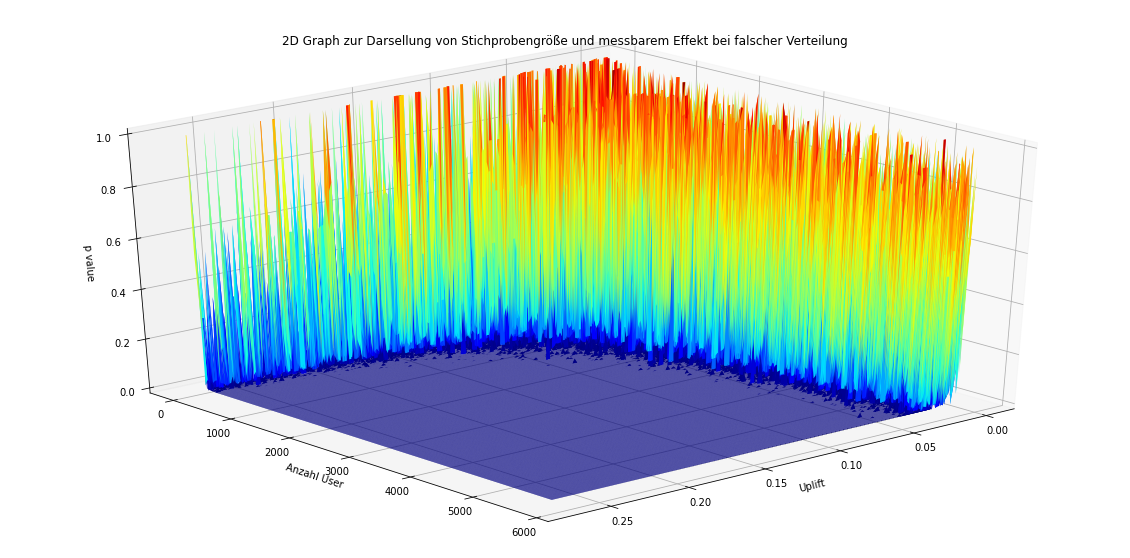

In [7]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# Other palette
ax.plot_trisurf(p_val_norm['lift'],p_val_norm['users'], p_val_norm['pval'], cmap=plt.cm.jet, linewidth=0.01)

ax.set_title("2D Graph zur Darsellung von Stichprobengröße und messbarem Effekt bei falscher Verteilung") 
ax.set(xlabel='Uplift', ylabel='Anzahl User',zlabel='p value')
# Rotate it
ax.view_init(30, 49)

plt.show()

In [8]:
# set a significance level for plotting
p_val_binom['signifikanz'] = 0.05

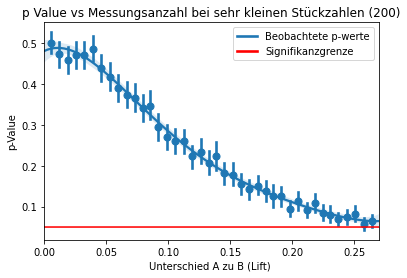

In [95]:
ax = sns.regplot(x='lift',y='pval', data=p_val_binom.loc[p_val_binom.users < 200], x_bins=40,order=5)
ax = sns.lineplot(x='lift', y='signifikanz',data=p_val_binom.loc[p_val_binom.users < 200], color='red',legend='brief')

ax.set_title("p Value vs Messungsanzahl bei sehr kleinen Stückzahlen (200)")
ax.set(xlabel='Unterschied A zu B (Lift) ', ylabel='p-Value')
legend = ax.legend(labels=["Beobachtete p-werte","Signifikanzgrenze"])
legend.legendHandles[1].set_color('red')


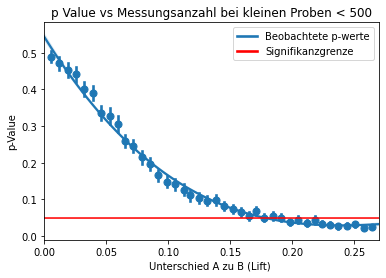

In [98]:
ax = sns.regplot(x='lift',y='pval', data=p_val_binom.loc[p_val_binom.users < 500], x_bins=40,order=3)
ax = sns.lineplot(x='lift', y='signifikanz',data=p_val_binom.loc[p_val_binom.users < 200], color='red',legend='brief')

ax.set_title("p Value vs Messungsanzahl bei kleinen Proben < 500")
ax.set(xlabel='Unterschied A zu B (Lift) ', ylabel='p-Value')
legend = ax.legend(labels=["Beobachtete p-werte","Signifikanzgrenze"])
legend.legendHandles[1].set_color('red')

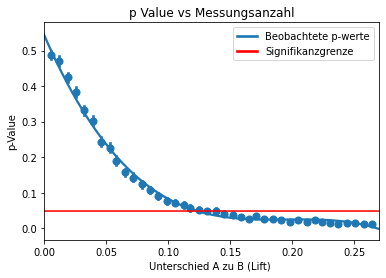

In [11]:
ax = sns.regplot(x='lift',y='pval', data=p_val_binom.loc[p_val_binom.users < 1000], x_bins=40,order=3)
ax = sns.lineplot(x='lift', y='signifikanz',data=p_val_binom.loc[p_val_binom.users < 200], color='red',legend='brief')

ax.set_title("p Value vs Messungsanzahl bis 1000 User")
ax.set(xlabel='Unterschied A zu B (Lift) ', ylabel='p-Value')
legend = ax.legend(labels=["Beobachtete p-werte","Signifikanzgrenze"])
legend.legendHandles[1].set_color('red')


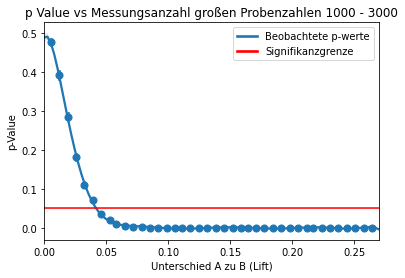

In [97]:
ax = sns.regplot(x='lift',y='pval', data=p_val_binom.loc[(p_val_binom.users > 1000) & (p_val_binom.users < 3000) ], x_bins=40,order=10)
ax = sns.lineplot(x='lift', y='signifikanz',data=p_val_binom.loc[p_val_binom.users < 200], color='red',legend='brief')

ax.set_title("p Value vs Messungsanzahl großen Probenzahlen 1000 - 3000")
ax.set(xlabel='Unterschied A zu B (Lift)', ylabel='p-Value')
legend = ax.legend(labels=["Beobachtete p-werte","Signifikanzgrenze"])
legend.legendHandles[1].set_color('red')


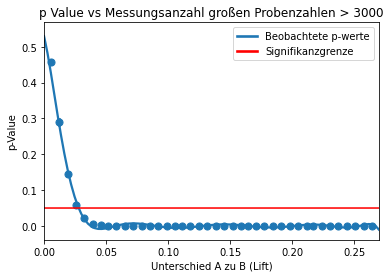

In [99]:
ax = sns.regplot(x='lift',y='pval', data=p_val_binom.loc[(p_val_binom.users > 3000) ], x_bins=40,order=10)
ax = sns.lineplot(x='lift', y='signifikanz',data=p_val_binom.loc[p_val_binom.users < 200], color='red',legend='brief')

ax.set_title("p Value vs Messungsanzahl großen Probenzahlen > 3000")
ax.set(xlabel='Unterschied A zu B (Lift)', ylabel='p-Value')
legend = ax.legend(labels=["Beobachtete p-werte","Signifikanzgrenze"])
legend.legendHandles[1].set_color('red')


In [75]:
users = p_val_binom.groupby('users').size().index.tolist()
measurable_difference = {}

for user in users:
    # only get those users
    dat = p_val_binom.loc[p_val_binom.users==user]
    
    # average pvalue for all replicas
    lift = pd.DataFrame(dat.groupby('lift')['pval'].mean() )
    sdif = pd.DataFrame(dat.groupby('lift')['pval'].std() )
    
    minimum_detectable = lift.loc[lift.pval < 0.05].index.to_series().min()
    streuung = sdif.loc[lift.index == minimum_detectable].pval.min()
    
    measurable_difference[user] = {"min_difference":minimum_detectable,
                                   "std_deviation" :streuung}


In [76]:
measurable_difference = pd.DataFrame.from_dict(  measurable_difference, orient='index').fillna(0.15)
measurable_difference['user_nr'] = measurable_difference.index.to_series()

In [82]:
measurable_difference['upper_bound'] = measurable_difference['min_difference']+ measurable_difference['std_deviation']

[Text(0, 0.5, 'Unterschied A zu B '), Text(0.5, 0, 'Zahl der User')]

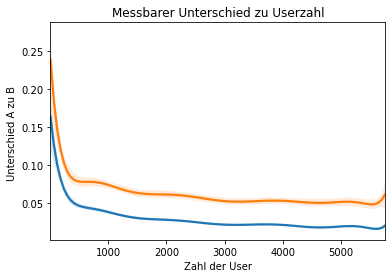

In [83]:
ax = sns.regplot(x='user_nr',y='min_difference' , data=measurable_difference, scatter=False , logistic=False, order = 10 )
ax = sns.regplot(x='user_nr',y='upper_bound' , data=measurable_difference, scatter=False , logistic=False, order = 10 )

ax.set_title("Messbarer Unterschied zu Userzahl")
ax.set(xlabel='Zahl der User', ylabel='Unterschied A zu B ')

In [133]:
# fit polynomial to detectability mean + tolerance range
z_safe = np.polyfit(measurable_difference['user_nr'], measurable_difference['upper_bound'] , 10)
p_safe = np.poly1d(z_safe)

# fit polynomial to minimu detectability mean
z_min = np.polyfit(measurable_difference['user_nr'], measurable_difference['min_difference'] , 10)
p_min = np.poly1d(z_min)

In [134]:
print('| user | Delta min | Delta absolute')
for n in range(15):
    user_zahl = n*300
    
    if user_zahl < 1000 and user_zahl!=0 :
        print(f'| {user_zahl}  | {np.round(p_safe(user_zahl),3)}     | {np.round(p_min(user_zahl),3)} ')
    elif user_zahl >=1000 :
        print(f'| {user_zahl} | {np.round(p_safe(user_zahl),3)}     | {np.round(p_min(user_zahl),3)} ')
    #print(f'für  user wird ein minimum Unterschied von {p(user_zahl)} benötigt')

| user | Delta min | Delta absolute
| 300  | 0.091     | 0.06 
| 600  | 0.078     | 0.044 
| 900  | 0.076     | 0.04 
| 1200 | 0.069     | 0.034 
| 1500 | 0.063     | 0.03 
| 1800 | 0.062     | 0.029 
| 2100 | 0.061     | 0.028 
| 2400 | 0.059     | 0.026 
| 2700 | 0.055     | 0.023 
| 3000 | 0.053     | 0.022 
| 3300 | 0.052     | 0.021 
| 3600 | 0.053     | 0.022 
| 3900 | 0.053     | 0.022 
| 4200 | 0.052     | 0.02 


In [132]:
p_safe(1000)

0.07394973297524834